<a href="https://colab.research.google.com/github/CodyHuff/Data-Science/blob/main/Cody_Huff_Final_Lab_Linear_Model_Photo_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [ ]:
#captures the stdout/stderr of a cell
%%capture 
!pip install wandb #build better models faster - weights and biases
!apt-get install poppler-utils #renders PDFs
!pip install pdf2image #convert PDFs to a PIL Image object
!pip install flashtorch #visualization techniques such as saliency maps and activation maximization to help the neural network understand the images
import requests #allows HTTP requests
from pdf2image import convert_from_path #Converts a PDF into image(s) via a path you give it
import matplotlib.pyplot as plt #matplotlib - useful for plotting graphs
import numpy as np # imports numpy library
import torch # Tensor computation with strong GPU acceleration
import requests #allows HTTP requests
from torchvision import * #efficient Image and Video transformations with pytorch
from torchvision.models import * #efficient Image and Video transformations
from flashtorch.utils import apply_transforms #apply the transformations
import wandb as wb #Weights & Biases - tool for accessing all of your Runs data and displaying, visualizing, or exporting it to external storage

In [ ]:
def GPU(data): # python function with a multi-dimensional matrix containing elements of a single data type
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data): #determines your cuda cores in your GPU for acceleration and uses them for the data
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): # plotting the matrix into a subplot
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') #greyscale
    ax.axis('off') #turning the axis off
    fig.set_size_inches(5, 5) #setting the size of the plot in inches
    plt.show() #showing the plot
    
def get_google_slide(url): #python function to grab the google slide presentation URL
    url_head = "https://docs.google.com/presentation/d/" #grabbing the head of the URL
    url_body = url.split('/')[5] #grabbing the body of the URL
    page_id = url.split('.')[-1] #grabbing the page ID of the URL
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id #returns the URL we grabbed

def get_slides(url): #python function to grab the contents of the google slides of the URL 
    url = get_google_slide(url) #assigning the URL to a variable
    r = requests.get(url, allow_redirects=True) #assigning the request to get the URL in variable r
    open('file.pdf', 'wb').write(r.content) #once the request ends up being true, it will open the google slide presentation in a PDF
    images = convert_from_path('file.pdf', 500) #this will convert the pdf to an IMAGE and we assign it to images
    return images #return the images

def load(image): #python function to load the image we just grabbed and returning it

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") #if there is cuda cores available, it will use them if not it'll use the CPU core(s)

In [4]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} 
              #grabs file with labels
model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [5]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p"

In [6]:
url = "https://docs.google.com/presentation/d/1VvvkYvRpcmzagJ-xD_RQk0dQf1tXAXsnxf0bQm1flg0/edit#slide=id.g1a937de311a_0_289" # <makes my url the assigned presentation slide

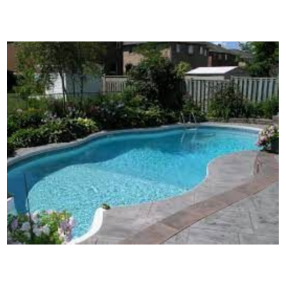

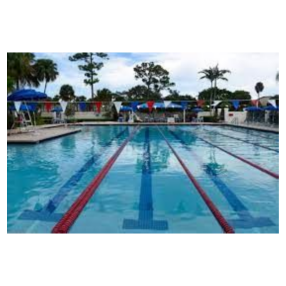

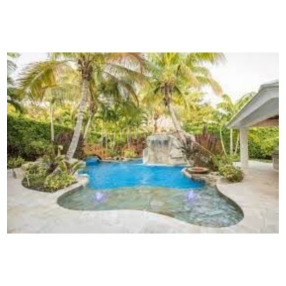

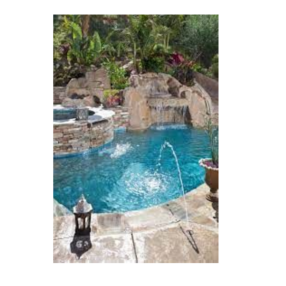

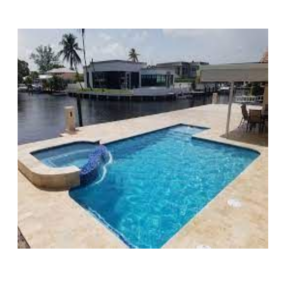

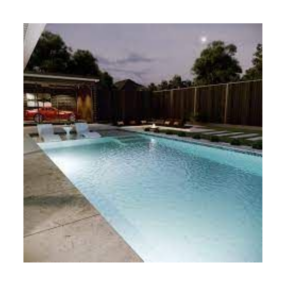

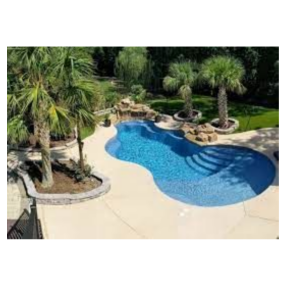

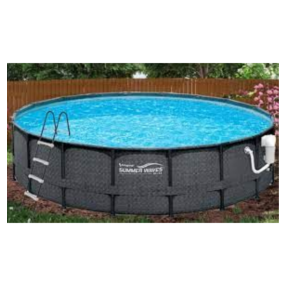

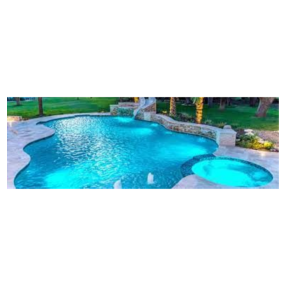

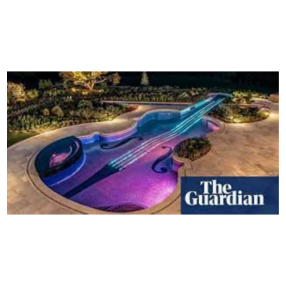

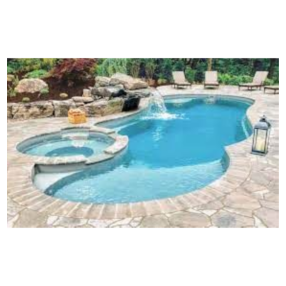

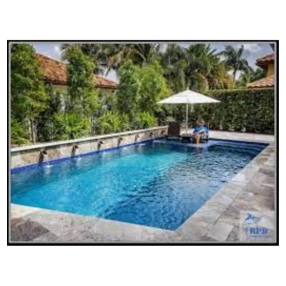

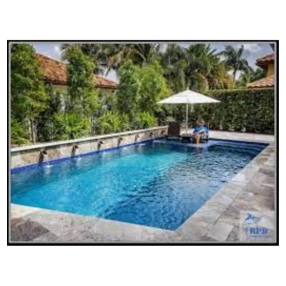

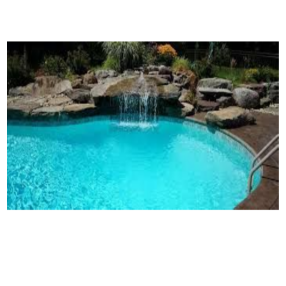

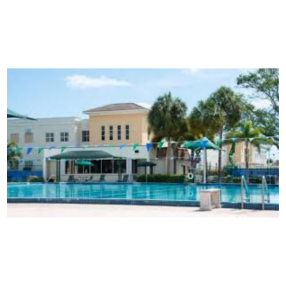

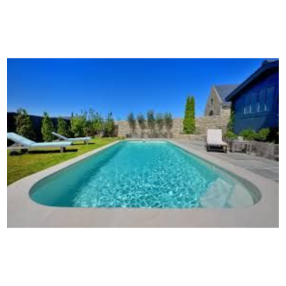

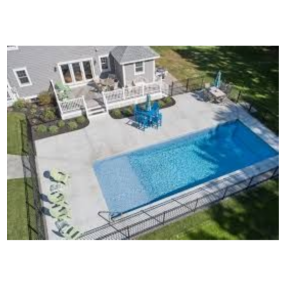

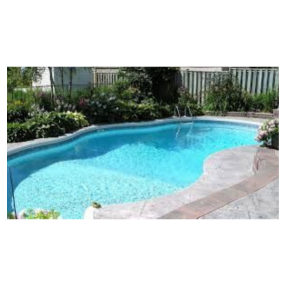

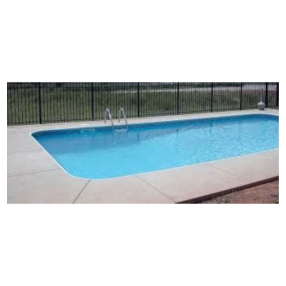

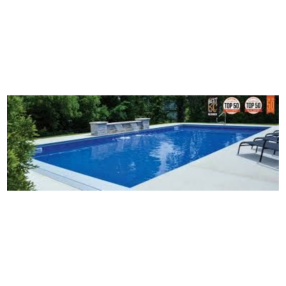

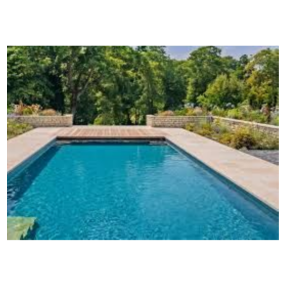

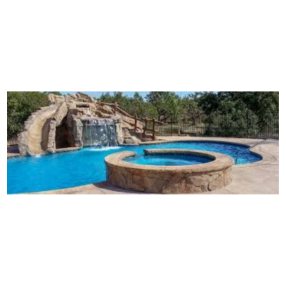

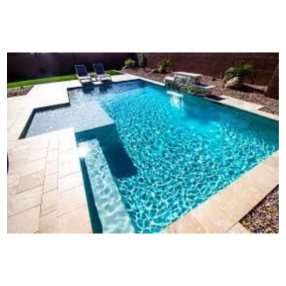

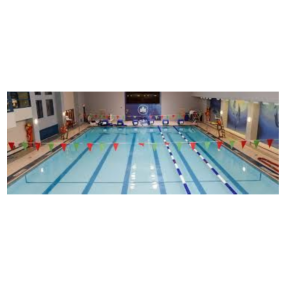

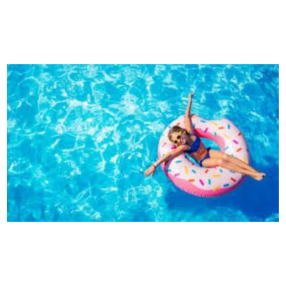

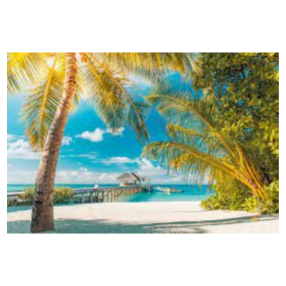

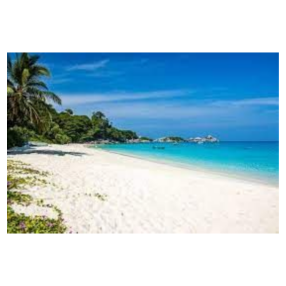

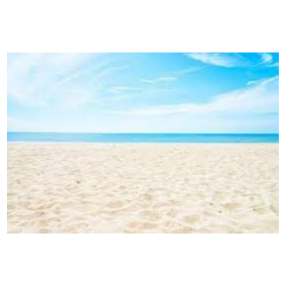

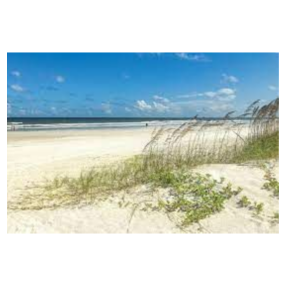

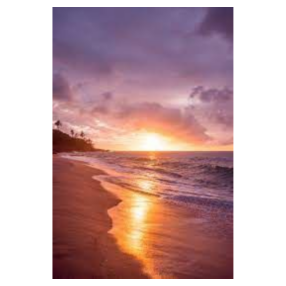

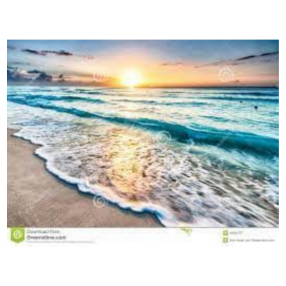

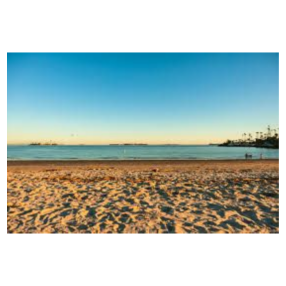

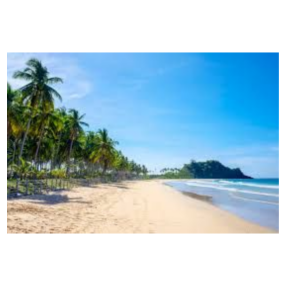

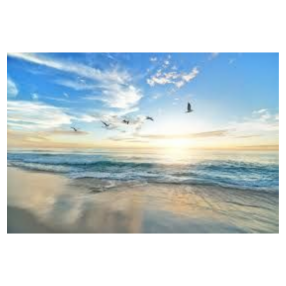

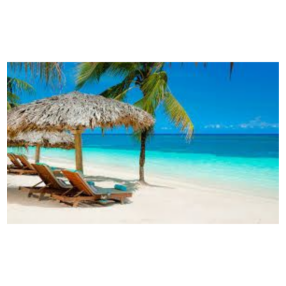

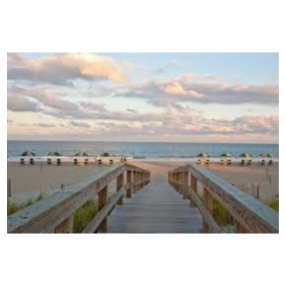

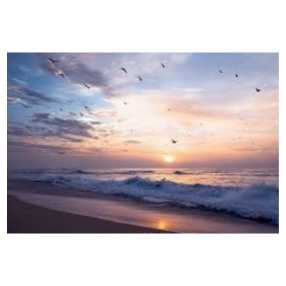

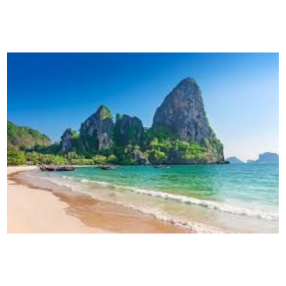

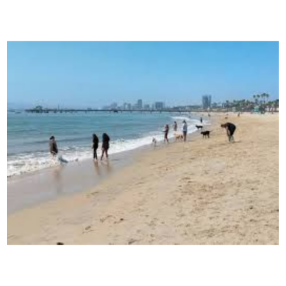

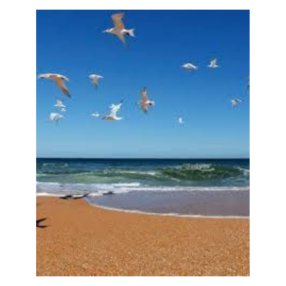

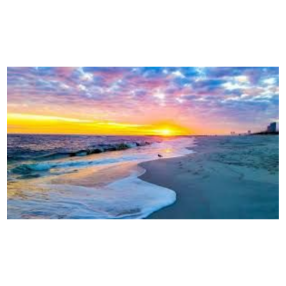

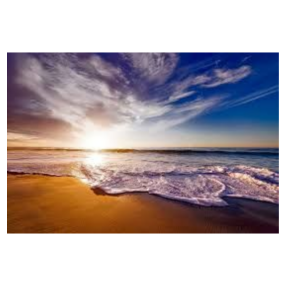

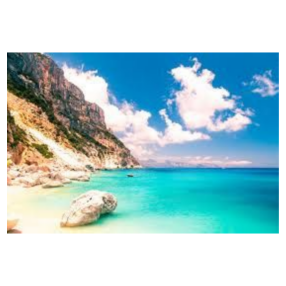

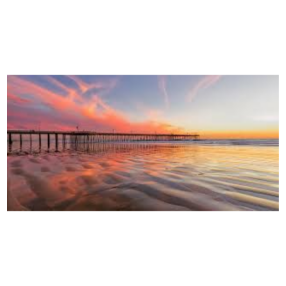

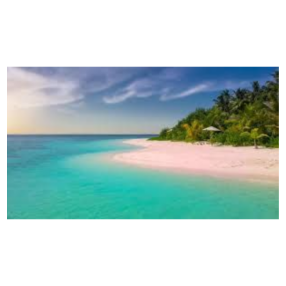

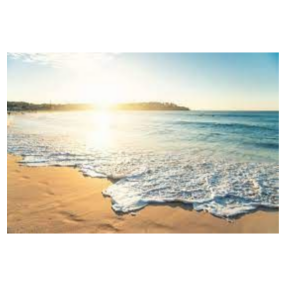

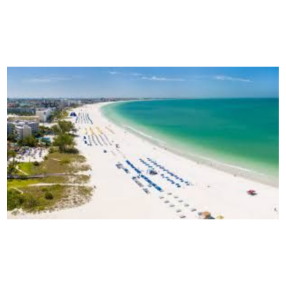

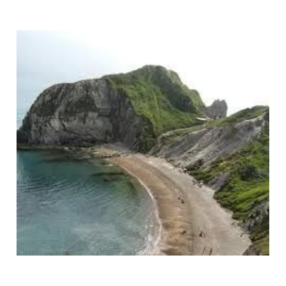

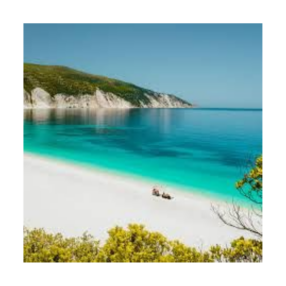

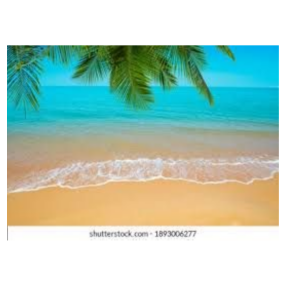

In [7]:
images = [] #assigns images to empty array

for image in get_slides(url): #loop that grabs my slides from the url

    plot(image) #plots images

    images.append(load(image)) #appends images from slides

images = torch.vstack(images) #stacks the images on top of one another

In [8]:
images.shape #gets shape of images variable

torch.Size([50, 3, 224, 224])

In [9]:
model(images) #displays tensor of images

tensor([[ 3.1955, -2.2480,  0.1009,  ..., -1.3012,  1.5906,  0.8728],
        [-2.7506, -3.2108,  0.0929,  ..., -6.0758, -1.7113, -2.0126],
        [ 3.8954,  0.4417, -1.9189,  ..., -2.5820,  4.7504,  0.2307],
        ...,
        [ 4.1234, -2.6583, -0.1805,  ..., -0.9315,  1.8357, -1.2378],
        [ 3.5242, -0.7257,  1.9397,  ..., -6.3426,  1.4275, -0.3981],
        [ 3.7323,  4.3036,  1.8346,  ..., -3.7129,  3.4038,  2.4342]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [10]:
y = model(images) #gives tensor for y

In [11]:
y.shape #shows the picture size

torch.Size([50, 1000])

In [12]:
guesses = torch.argmax(y, 1).cpu().numpy() #returns the indices of the maximum value of the elements in the input tensor and will go off of the cpu

In [13]:
for i in list(guesses):
    print(labels[i]) #prints out a list of the labels

patio, terrace
maypole
African chameleon, Chamaeleo chamaeleon
monitor
patio, terrace
seashore, coast, seacoast, sea-coast
patio, terrace
pencil box, pencil case
power drill
sunglasses, dark glasses, shades
seashore, coast, seacoast, sea-coast
solar dish, solar collector, solar furnace
solar dish, solar collector, solar furnace
promontory, headland, head, foreland
streetcar, tram, tramcar, trolley, trolley car
seashore, coast, seacoast, sea-coast
solar dish, solar collector, solar furnace
seashore, coast, seacoast, sea-coast
rule, ruler
sleeping bag
mountain tent
speedboat
modem
pencil box, pencil case
pencil box, pencil case
sarong
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
seashore, coast, seacoast, sea-coast
pill bottle
seashore, coast, seacoast, sea-coast
breakwater, groin, groyne, mole, bulwark, seawall, jetty
seashore, coast, seacoast, sea-coast
sandbar, sand bar
seashore, coast, seacoast, sea-coast
dam, dike, dyke
seashore, coast, seacoast, sea-coa

In [14]:
Y = np.zeros(50,) #this will number pics 1-25 "0"
Y[25:] = 1         #pics 25-50 "1"

In [18]:
Y #displays array of Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [15]:
X = y.detach().cpu().numpy() #returns a new Tensor, detached from the current graph and assigning it to X, using the CPU

In [16]:
X.shape #displays the shape of x

(50, 1000)

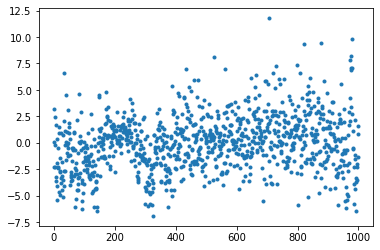

In [17]:
plt.plot(X[0],'.') #displahs x-shape plot

In [19]:
X[0] #displays values of x-shape

array([ 3.19550943e+00, -2.24804521e+00,  1.00909472e-01, -2.11752057e-01,
       -2.28467393e+00,  2.47038007e+00,  1.68530989e+00, -3.65236855e+00,
       -3.25611019e+00,  3.24299544e-01, -5.38122988e+00, -4.09589100e+00,
       -1.95213890e+00, -2.30296826e+00, -4.75943804e-01, -2.35147643e+00,
       -4.64981556e+00,  1.49126506e+00,  8.76472652e-01, -2.71645951e+00,
       -4.96194887e+00, -2.76012087e+00, -1.47916019e+00,  9.10596550e-01,
       -3.37961102e+00, -3.80766439e+00, -1.81974280e+00, -3.15631390e+00,
       -4.45191956e+00,  7.00235367e-01, -5.17520428e+00, -3.53985786e+00,
       -4.13536501e+00,  2.04060245e+00,  6.55551147e+00, -2.63353109e+00,
       -1.81295931e-01, -2.67666960e+00,  1.09918845e+00,  4.53806686e+00,
       -1.58620238e+00,  1.00118756e-01, -2.20167220e-01, -1.00516558e+00,
        1.03094602e+00, -1.29677033e+00, -5.13130248e-01,  3.09613037e+00,
       -5.94358444e-02,  9.51333046e-01,  1.86370289e+00,  1.47946525e+00,
       -1.12071061e+00, -

In [20]:
np.argmax(X[0]) #indices max value of first emement in the x tensor

706

In [21]:
labels #displays label array and can be specified by putting a number in brackets

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

In [22]:
np.argsort(X[0])[::-1][0:10] #indirectly sorts among the given axis

array([706, 978, 876, 821, 975, 525, 973, 797, 730, 976])

(array([ 26.,  88., 188., 282., 258., 107.,  33.,  12.,   5.,   1.]),
 array([-6.9170427 , -5.0485296 , -3.1800168 , -1.3115036 ,  0.55700934,
         2.4255223 ,  4.2940354 ,  6.1625485 ,  8.031061  ,  9.899574  ,
        11.768087  ], dtype=float32),
 <a list of 10 Patch objects>)

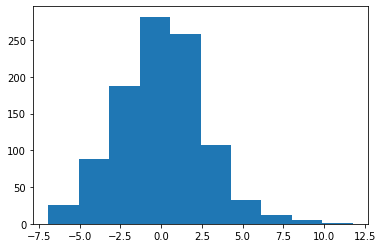

In [24]:
plt.hist(X[0]) #plots histogra of x array

In [ ]:
X = GPU_data(X) #determines cuda cores in GPU for acceleration and uses them for the data array X. assigning it to X
Y = GPU_data(Y) #determines cuda cores in GPA for acceleration and uses them for the data array Y. assigning it to Y

In [26]:
def softmax(x): #converts vector numbers into vector of possibilities
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s #returns softmax into variable x

In [27]:
def cross_entropy(outputs, labels):  #compares each of the predicted probabilities to actual class output, 0 or 1
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [28]:
def randn_trunc(s): #truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
def Truncated_Normal(size): #assigns formulas to these variables based on the size of the data array

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z #returns z variable

In [30]:
def acc(out,y):
    with torch.no_grad(): #disables gradient calculation
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [31]:
X.shape #shows x array shape

torch.Size([50, 1000])

In [32]:
def get_batch(mode):
    b = c.b #batch size assigned to b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) #creates array based on x and generates random values
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y #returns x,y values

In [33]:
def model(x,w): #model x and w pyton function 

    return x@w[0] #returns it at first value

In [34]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [ ]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001 #descends gradient slowly to not overshoot
c.b = 32 #batch size
c.epochs = 100000 # # of epochs used

w = [GPU(Truncated_Normal((1000,2)))] #grabs truncated numbers and assigns them to w

optimizer = torch.optim.Adam(w, lr=c.h)  #activates adam algorithm

for i in range(c.epochs):

    x,y = get_batch('train') #gets batch from train array

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss}) #logs the log loss

    make_plots() #creates plots


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 